In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_1 = pd.read_csv('F:/Shashi Files/Personal/Wonderla/DI/marketing_sample_for_amazon_com-amazon_com_product__20210401_20210430__30k_data.csv')
data_2 = pd.read_excel('F:/Shashi Files/Personal/Wonderla/DI/marketing_sample_for_amazon_com-amazon_com_product__20210401_20210430__30k_data.xlsx')
data_3 = pd.read_csv('F:/Shashi Files/Personal/Wonderla/DI/Whatsgoodly - Thought Catalog Influencers.csv')

## 1) Analysis Based on the product reviews: 

### a) Promotion Focus: Identify the product that should be promoted more based on the reviews.  

In [5]:
relevant_columns = ['Title', 'Num Of Reviews', 'Average Rating', 'Price', 
                    'Stock', 'Color Category', 'Manufacturer', 'Five Star',
                   'Four Star', 'Three Star', 'Two Star', 'One Star']

In [6]:
B = data_1.loc[:, data_1.columns.isin(relevant_columns)]

In [7]:
#B = data_1

In [8]:
B['Price'] = B['Price'].replace(',', '', regex=True)

def convert_price_to_float(x):
    if isinstance(x, str) and ' - ' in x:
        return np.mean([float(i) for i in x.split(' - ')])
    else:
        return float(x)  

B['Price'] = B['Price'].apply(convert_price_to_float)


C:\Users\user\AppData\Local\Temp\ipykernel_664\1103394447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Price'] = B['Price'].replace(',', '', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_664\1103394447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Price'] = B['Price'].apply(convert_price_to_float)


In [9]:
B

,Title,Num Of Reviews,Average Rating,Manufacturer,Price,Stock,Color Category,Five Star,Four Star,Three Star,Two Star,One Star
0,"Ichiias Drone, FPV Drone, 2.4G RC Drone for Dr...",0.0,0.0,"Ichiias Drone, FPV Drone, 2.4G RC Drone for Dr...",49.99,True,1080p,NaN,NaN,NaN,NaN,NaN
1,フタリジカン SG108 drone 4k HD with Camera 5G WiFi G...,0.0,0.0,フタリジカン SG108 drone 4k HD with Camera 5G WiFi G...,196.75,True,NaN,NaN,NaN,NaN,NaN,NaN
2,CHENJUAN 3D Printed Protection Case for BN-880...,0.0,0.0,CHENJUAN 3D Printed Protection Case for BN-880...,14.06,True,Blue BN 220,NaN,NaN,NaN,NaN,NaN
3,Visit the Sennheiser Consumer Audio Store Senn...,557.0,4.1,Visit the Sennheiser Consumer Audio Store Senn...,124.74,True,Black,318.0,112.0,45.0,39.0,45.0
4,oil-LIKIO RC Drone accessories Oil-LIKIO RC Dr...,0.0,0.0,oil-LIKIO RC Drone accessories Oil-LIKIO RC Dr...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,MidnightGirls Cotton Protective Unisex Adjusta...,5.0,4.3,MidnightGirls Cotton Protective Unisex Adjusta...,NaN,False,Black,3.0,2.0,2.0,NaN,NaN
29996,GzxLaY 3Pcs PCB Ribbon Gimbal Flex Repair Flat...,0.0,0.0,GzxLaY 3Pcs PCB Ribbon Gimbal Flex Repair Flat...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
29997,Visit the Amazon Renewed Store Apple Watch Ser...,2040.0,4.5,Visit the Amazon Renewed Store Apple Watch Ser...,320.00,True,Silver Aluminum Case,1632.0,164.0,62.0,21.0,143.0
29998,Framonics Tablet PC 2GB RAM 32GB ROM Cellular ...,0.0,0.0,Framonics Tablet PC 2GB RAM 32GB ROM Cellular ...,99.98,True,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
C = B.groupby(['Title']).agg({'Num Of Reviews':'sum', 'Average Rating':'mean', 'Five Star':'sum', 'Four Star':'sum', 'Three Star':'sum', 'Two Star':'sum', 'One Star':'sum', 'Price':'mean'})

In [11]:
C.columns

Index(['Num Of Reviews', 'Average Rating', 'Five Star', 'Four Star',
       'Three Star', 'Two Star', 'One Star', 'Price'],
      dtype='object')

### Top 5 Products (based on 'Num Of Reviews') which may not require any promotion/marketing campaign 

In [12]:
C.sort_values(by = ['Num Of Reviews'], ascending = False).head(5)

,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price
Title,,,,,,,,
Amazon Fire TV Stick 4K streaming device with Alexa Voice Remote | Dolby Vision | 2018 release,584770.0,4.7,491207.0,58477.0,17544.0,5848.0,11696.0,NaN
Amazon All-new Echo Dot (4th Gen) | Smart speaker with Alexa | Glacier White,216973.0,4.7,175749.0,26037.0,8679.0,2170.0,4340.0,49.99
Amazon Echo Dot (2nd Generation) - Smart speaker with Alexa - Black,213565.0,4.5,155903.0,29900.0,14950.0,6407.0,8543.0,NaN
"Amazon Echo Show 8 Charcoal with Blink Mini Indoor Smart Security Camera, 1080 HD with Motion Detection",200362.0,4.8,168305.0,22040.0,6011.0,2004.0,2004.0,119.99
"Amazon Fire HD 10 Tablet (10.1"" 1080p full HD display, 32 GB) – Black",177194.0,4.6,139984.0,23036.0,7088.0,3544.0,5316.0,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_664\2405402960.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

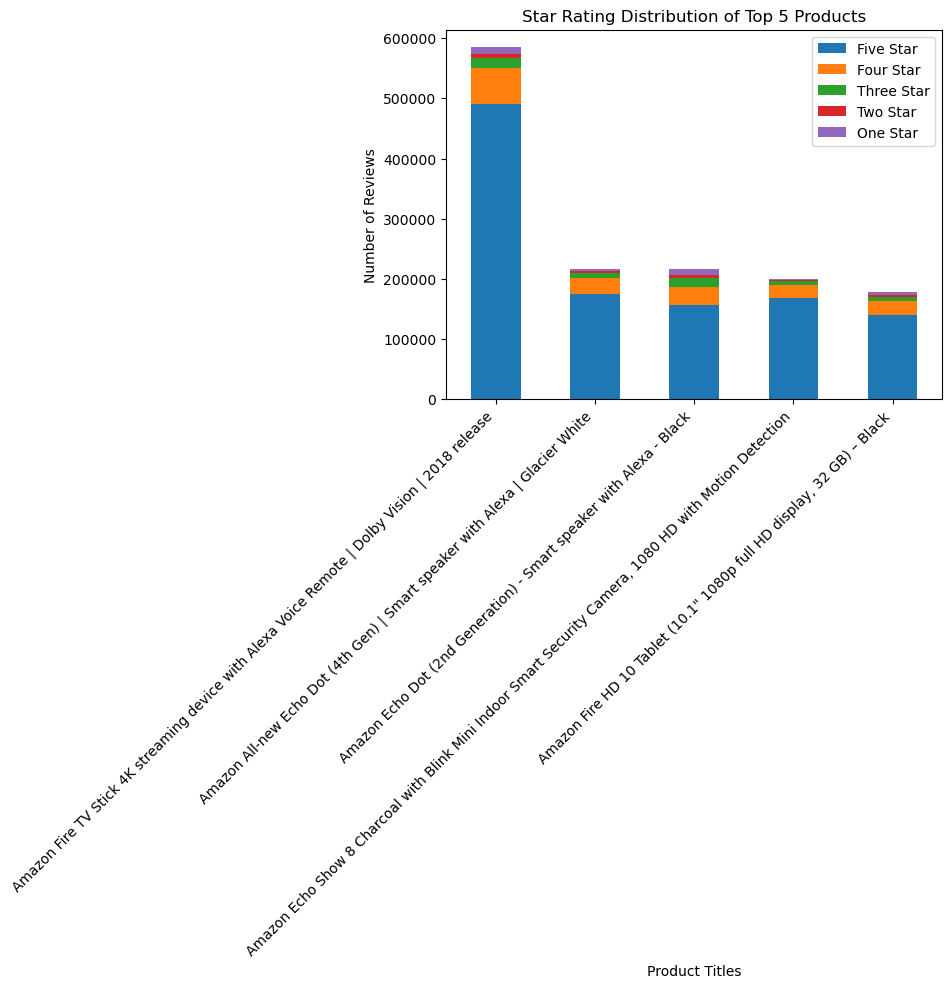

In [13]:
import matplotlib.pyplot as plt

# Select top 5 products with the highest 'Num Of Reviews'
top_5 = C.sort_values(by='Num Of Reviews', ascending=False).head(5)

# Plotting a stacked bar chart for the top 5 products based on different star ratings
plt.figure(figsize=(10, 6))
top_5[['Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star']].plot(kind='bar', stacked=True)
plt.xlabel('Product Titles')
plt.ylabel('Number of Reviews')
plt.title('Star Rating Distribution of Top 5 Products')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

# Display the stacked bar chart
plt.show()



### Identifying products that may require promotions/marketing campaign

### 1- Products which have low count of 'Num Of Reviews' but have good ratings (high count of 5stars and 4stars): 

In [14]:
#Not considering products which dont have any reviews
D = C[C['Num Of Reviews'] != 0.0]

In [15]:
D['% of Good Ratings'] = ((D['Five Star'] + D['Four Star'])/D['Num Of Reviews'])*100

C:\Users\user\AppData\Local\Temp\ipykernel_664\2610270596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['% of Good Ratings'] = ((D['Five Star'] + D['Four Star'])/D['Num Of Reviews'])*100


In [16]:
D['Num Of Reviews'].describe()

count      9817.000000
mean        906.255475
std        8593.995143
min           1.000000
25%           5.000000
50%          30.000000
75%         185.000000
max      584770.000000
Name: Num Of Reviews, dtype: float64

In [17]:
# Calculate the score based on the given criteria
def calculate_promotion_score(row):
    good_ratings = row['% of Good Ratings']
    
    if good_ratings >= 90:
        good_ratings_score = 5
    elif 70 <= good_ratings < 90:
        good_ratings_score = 4
    elif 50 <= good_ratings < 70:
        good_ratings_score = 3
    elif 30 <= good_ratings < 50:
        good_ratings_score = 2
    elif 10 <= good_ratings < 30:
        good_ratings_score = 1
    else:
        good_ratings_score = 0

    num_of_reviews = row['Num Of Reviews']
    if num_of_reviews >= D['Num Of Reviews'].quantile(0.75):
        num_of_reviews_score = 2
    elif num_of_reviews >= D['Num Of Reviews'].quantile(0.5):
        num_of_reviews_score = 3
    elif num_of_reviews >= D['Num Of Reviews'].quantile(0.25):
        num_of_reviews_score = 4
    else:
        num_of_reviews_score = 5

    return good_ratings_score + num_of_reviews_score


# Apply the function to create a new 'Promotion Score' column
D['Promotion Score'] = D.apply(calculate_promotion_score, axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_664\2282787569.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['Promotion Score'] = D.apply(calculate_promotion_score, axis=1)


In [18]:
D['Promotion Score'].value_counts()

7     2465
6     2439
8     1578
10    1534
5      945
9      800
4       49
2        5
3        2
Name: Promotion Score, dtype: int64

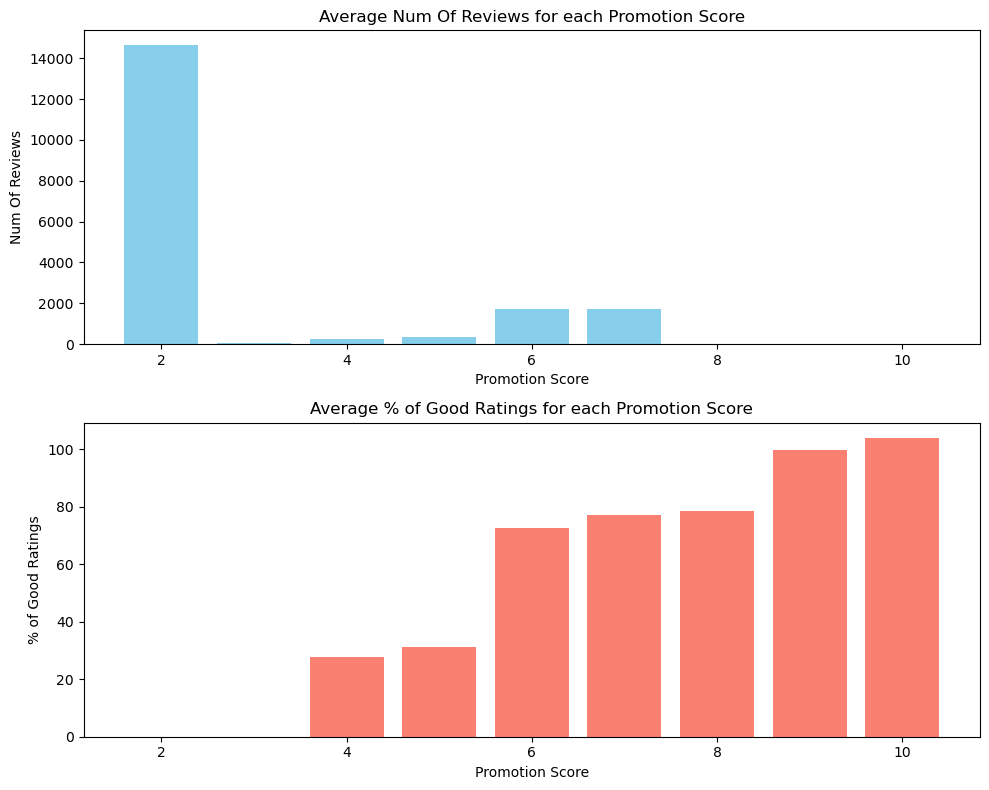

In [19]:
import matplotlib.pyplot as plt

# Grouping by 'Promotion Score' and aggregating data
grouped = D.groupby('Promotion Score').agg({'Num Of Reviews': 'mean', '% of Good Ratings': 'mean'})

# Creating subplots for 'Num Of Reviews' and '% of Good Ratings' for each 'Promotion Score'
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotting 'Num Of Reviews' for each 'Promotion Score'
axes[0].bar(grouped.index, grouped['Num Of Reviews'], color='skyblue')
axes[0].set_xlabel('Promotion Score')
axes[0].set_ylabel('Num Of Reviews')
axes[0].set_title('Average Num Of Reviews for each Promotion Score')

# Plotting '% of Good Ratings' for each 'Promotion Score'
axes[1].bar(grouped.index, grouped['% of Good Ratings'], color='salmon')
axes[1].set_xlabel('Promotion Score')
axes[1].set_ylabel('% of Good Ratings')
axes[1].set_title('Average % of Good Ratings for each Promotion Score')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [20]:
# Example: Conduct hypothesis testing (e.g., t-test) to compare average ratings of products with low vs. high review counts
from scipy.stats import ttest_ind

low_review_products = D[D['Num Of Reviews'] < D['Num Of Reviews'].median()]
high_review_products = D[D['Num Of Reviews'] >= D['Num Of Reviews'].median()]

t_stat, p_value = ttest_ind(low_review_products['Average Rating'], high_review_products['Average Rating'])
if p_value < 0.05:
    print("Statistically significant difference found between low and high review count products.")
else:
    print("No statistically significant difference between low and high review count products.")


Statistically significant difference found between low and high review count products.


In [21]:
D['Promotion Score'].mean()

7.3331975145156365

In [22]:
D[D['Promotion Score'] > D['Promotion Score'].mean()].sort_values(by = '% of Good Ratings', ascending = False)

,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price,% of Good Ratings,Promotion Score
Title,,,,,,,,,,
Hurricanes Portable Carrying Case Travel Bag for Mavic Mini Drone Body,2.0,4.5,1.0,2.0,0.0,0.0,0.0,NaN,150.0,10
Visit the SAMSUNG Store Samsung Galaxy Note 10+ 256GB Verizon Only Aura Blue (Aura Blue),2.0,4.5,2.0,1.0,0.0,0.0,0.0,804.97,150.0,10
"Narustop Fan Mart Soft Mouth Guard with Replaceable Filters Activated Carbon Cover for Kitchen Running Cycling Washable Protection Full Seal Guard, Anime Naruto Sasuke Moonlight Chidori - 16 Filter",2.0,4.6,2.0,1.0,0.0,0.0,0.0,19.88,150.0,10
inDigi Indigi GSM Unlocked 4G LTE 7-inch TabletPC & Smartphone (Android 9.0 Pie OS + DualSIM + 4Core 2GB/16GB Storage + Google Play Store),2.0,4.7,2.0,1.0,0.0,0.0,0.0,139.99,150.0,10
Visit the SAMSUNG Store Samsung Galaxy S8 SM-G950UZKAXAA GSM/CDMA Factory Unlocked 64GB - US Warranty (Midnight Black),2.0,4.6,2.0,1.0,0.0,0.0,0.0,NaN,150.0,10
...,...,...,...,...,...,...,...,...,...,...
"Powerole 10PCS Mask Extender Strap Adjustable Silicone Ear Savers,Mask Lanyard Holder Extender for Neck or Head, Colorful Glasses Retainer Anti-Dropping Ear Loop for Kids Senior Adults",4.0,3.5,1.0,1.0,1.0,2.0,0.0,7.39,50.0,8
CHENSEN 50Pcs ST Saint Patricks Day Disposable Face Mask 3 Layer Earloop Breathable Holiday Protective Shamrock Masks,2.0,2.5,0.0,1.0,0.0,0.0,1.0,13.98,50.0,8
CHENJUAN for S166 S167 GPS RC Drone S167 Quadcopter Main Gear Motor Gears Set Accessories Spare Parts,2.0,2.8,1.0,0.0,0.0,0.0,2.0,13.55,50.0,8


In [23]:
C.columns

Index(['Num Of Reviews', 'Average Rating', 'Five Star', 'Four Star',
       'Three Star', 'Two Star', 'One Star', 'Price'],
      dtype='object')

In [24]:
# Function to identify products with potential marketing campaign issues based on ratings distribution
def detect_misleading_marketing(row):
    # Extracting the ratings columns
    ratings = row[['Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star']]
    
    # Calculate the sum of ratings
    total_ratings = ratings.sum()
    
    # Calculate the percentage of low ratings (1-star and 2-star ratings)
    low_ratings_percentage = ((ratings['One Star'] + ratings['Two Star']) / total_ratings * 100) if total_ratings > 0 else 0
    
    # If the percentage of low ratings is higher than a threshold, flag it as a potential issue
    if low_ratings_percentage > 50:  # You can adjust the threshold percentage as needed
        return True
    else:
        return False

# Apply the function to each row in the dataframe to identify products with potential issues in the marketing campaign
C['Potential Issue'] = C.apply(detect_misleading_marketing, axis=1)


In [25]:
C['Potential Issue'].value_counts()

False    28547
True       491
Name: Potential Issue, dtype: int64

In [26]:
#These products which may require a new marketing campaign/promotional strategy.
C[C['Potential Issue'] == True].sort_values(by = ['Num Of Reviews'], ascending = False)

,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price,Potential Issue
Title,,,,,,,,,
"Visit the MED PRIDE Store Medpride Medical Examination Latex Gloves| 5 mil Thick, Powder-Free, Non-Sterile, Heavy Duty Exam Gloves",2425.0,4.6,0.0,0.0,0.0,0.0,2425.0,74.99,True
Fdsd in-Ear S530 Mini Style Wireless Bluetooth Stereo Headphone Headset Earbud Earphone Earpiece with Mic & Hands Free Calls for iPhone/Samsung (Beige),114.0,2.7,30.0,10.0,13.0,18.0,45.0,NaN,True
"Jettom Kids Tablet, 7 Inch Android Tablets for Kids Toddlers Learning Tablet, IPS HD Display, Dual Cameras, 1GB RAM 32GB ROM WiFi with Handheld Kids-Proof Silicon Case for Kids Educational (Blue)",101.0,2.8,35.0,10.0,6.0,7.0,47.0,NaN,True
Visit the Koss Store Koss BT190iK Wireless Bluetooth Earbuds | in-line Microphone & Touch Controls | Sweat Resistant | Three Cushion Sizes Included | 6 Hour Battery Life | Light Weight | Black,96.0,2.8,26.0,11.0,10.0,15.0,36.0,NaN,True
Camelio CAM740 Personalization Kit,89.0,2.6,17.0,17.0,8.0,18.0,33.0,79.88,True
...,...,...,...,...,...,...,...,...,...
PARADASON 2pack - Copper Fiber Flag Eagle Mask (Reuable) Medium,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,True
"Oumij Long Standby Mobile Phone,Retro Mobile Phone, W2 Four Card Four Standby Quad-Band 2G Retro Bluetooth 2400mAh Mobile Phone 100-240V US(Gold)",1.0,2.0,0.0,0.0,0.0,1.0,0.0,62.99,True
"Onamicit Smart Watch,1.3 Inch Fitness Tracker with HR Monitor, Sleep Tracker, Stopwatch, IP65 Waterproof Fitness Watch Works with iOS, Android for Men, Women-Black",1.0,2.0,0.0,0.0,0.0,1.0,0.0,NaN,True


In [27]:
C

,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price,Potential Issue
Title,,,,,,,,,
"""FLEUR"" Q 2 Pack EC3 Male RC Connector to EC2 Female Connector 18 AWG",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
"""FLEUR"" Q 2 Pack Female Tamiya Connector to Deans Male Connector Adapter",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
"""FLEUR"" Q 2 Pk Female JST Connector to Female XT60 22 AWG",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
"""FLEUR"" Q 5 Pack HXT 3.5MM Banana Female PigTail 14 AWG Wire Different Lengths (1.5) (6"")",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
"""FLEUR"" Q EC2 Male RC Connector to 3.5MM Banana Male Male 18 AWG RC Connector",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
...,...,...,...,...,...,...,...,...,...
フタリジカン SG108 drone 4k HD with Camera 5G WiFi GPS drone brushless FPV Drone RC 1KM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.75,False
"不适用 SG906 Pro Limitless with GPS Auto Return Home/5G WiFi FPV/4K UHD Dual Camera/Brushless Motors/25 MINS Flight Time/Long Control Range Quadcopter (EPP Suitcase, Triple Cell)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
"不适用 SG906 Pro Limitless with GPS Auto Return Home/5G WiFi FPV/4K UHD Dual Camera/Brushless Motors/25 MINS Flight Time/Long Control Range Quadcopter (Travel Satchel, Triple Cell)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False


In [28]:
C['Total Ratings'] = C[['Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star']].sum(axis=1)
C['Low Ratings %'] = ((C['One Star'] + C['Two Star']) / C['Total Ratings']) * 100

In [29]:
C[C['Low Ratings %'] > 80].sort_values(by = 'Num Of Reviews', ascending = False)

,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price,Potential Issue,Total Ratings,Low Ratings %
Title,,,,,,,,,,,
"Visit the MED PRIDE Store Medpride Medical Examination Latex Gloves| 5 mil Thick, Powder-Free, Non-Sterile, Heavy Duty Exam Gloves",2425.0,4.6,0.0,0.0,0.0,0.0,2425.0,74.99,True,2425.0,100.0
"Dilwe1 S21 Unlocked Smartphone, 7.2in HD Ultra Screen Mobile Phone, 2+32G Dual Sim Fingerprint Unlocked Cell Phones, Built-in 5000mAh Battery for Android 10.0 White(US)",8.0,1.2,0.0,0.0,0.0,2.0,7.0,NaN,True,9.0,100.0
"Polaroid Neckband with Magnetic Ear Tips Headphone, White (PBT96WH)",7.0,1.0,0.0,0.0,0.0,0.0,7.0,NaN,True,7.0,100.0
Visit the Azpen Store 10 Inch Android 4.4 Tablet by Azpen for Internet Browsing and Social Media Basic Use Entry Level,7.0,1.3,1.0,0.0,0.0,0.0,7.0,69.95,True,8.0,87.5
HeliMax Heli-Max RTF SLT 2.4GHz 1Si Quadcopter Without Camera,7.0,1.4,0.0,0.0,0.0,4.0,4.0,NaN,True,8.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
Microheli Co. Microheli Carbon Fiber w/ 3D Printing Freestyle Frame (BL) - EMAX Tinyhawk II (MH-TNH2005XBL),1.0,2.0,0.0,0.0,0.0,1.0,0.0,19.99,True,1.0,100.0
"Mobile Spec Headsets, 108 min. Talk Time, Wireless",1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,True,1.0,100.0
"N/W YoumiAi Zigbee Smart Light Dimmer Switch DIY Breaker Module, 2 Way, Smart Life/Tuya APP Remote Control, Compatible with Alexa Echo Google Home",1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,True,1.0,100.0


### c) Pricing and Review Impact: Examine if there is a correlation between pricing and product reviews and share your inputs

In [30]:
C.shape

(29038, 11)

In [31]:
C['Price'].isnull().sum()

11920

In [32]:
(C['Price'].isnull().sum()/C.shape[0])*100

41.049659067428884

In [33]:
E = C[C['Price'].isnull() == False]

In [34]:
columnsforcorr = ['Num Of Reviews', 'Average Rating', 'Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star', 'Price']

In [35]:
correlation_matrix = E[columnsforcorr].corr()

In [36]:
E[columnsforcorr].corr().unstack().abs().sort_values(ascending = False) [E[columnsforcorr].corr().unstack().abs().sort_values(ascending = False).index.get_level_values(0) !=E[columnsforcorr].corr().unstack().abs().sort_values(ascending = False).index.get_level_values(1)]

Num Of Reviews  Five Star         0.984768
Five Star       Num Of Reviews    0.984768
Three Star      Four Star         0.972918
Four Star       Three Star        0.972918
                Num Of Reviews    0.967803
Num Of Reviews  Four Star         0.967803
Two Star        Three Star        0.965385
Three Star      Two Star          0.965385
Five Star       Four Star         0.959522
Four Star       Five Star         0.959522
One Star        Two Star          0.945171
Two Star        One Star          0.945171
One Star        Three Star        0.922464
Three Star      One Star          0.922464
Num Of Reviews  Three Star        0.913769
Three Star      Num Of Reviews    0.913769
Four Star       Two Star          0.900656
Two Star        Four Star         0.900656
Three Star      Five Star         0.888679
Five Star       Three Star        0.888679
One Star        Four Star         0.855109
Four Star       One Star          0.855109
Num Of Reviews  Two Star          0.821283
Two Star   

In [37]:
pd.DataFrame(data.corr().abs().unstack().sort_values(ascending = False)[data.corr().abs().unstack().sort_values(ascending = False).index.get_level_values(0) != data.corr().abs().unstack().sort_values(ascending = False).index.get_level_values(1)])[0][0]

NameError: name 'data' is not defined

In [ ]:
correlation_matrix

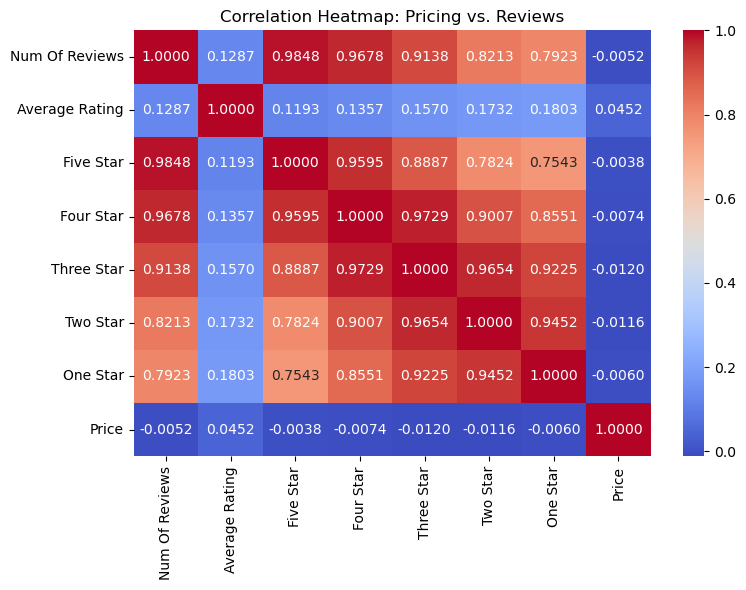

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Heatmap: Pricing vs. Reviews')
plt.tight_layout()
plt.show()


### 2) Buyer's Perspective: Imagine you are the buyer for these categories.

Recommend products to buy, remove, or manage based on the data analysis. 

In [39]:
def calculate_score(row, budget):
    weight_rating = 0.5
    weight_reviews = 0.4
    
    avg_rating = row['Average Rating']
    num_reviews = row['Num Of Reviews']
    price = row['Price']
    
    # Calculate the score based on the defined weights and parameters
    score = (weight_rating * avg_rating) + (weight_reviews * num_reviews)
    
    return score

# Set the budget (maximum price)
budget_limit = 200  # Modify this value according to your budget

# Apply the scoring function to create a 'Score' column in the dataframe
D['Score'] = D.apply(lambda row: calculate_score(row, budget_limit), axis=1)

# Filter products within the specified budget and sort them by the calculated score
products_within_budget = D[D['Price'] <= budget_limit].sort_values(by='Score', ascending=False)

# Display the recommended products within the budget
products_within_budget


C:\Users\user\AppData\Local\Temp\ipykernel_664\2140003036.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['Score'] = D.apply(lambda row: calculate_score(row, budget_limit), axis=1)


,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price,% of Good Ratings,Promotion Score,Score
Title,,,,,,,,,,,
Amazon All-new Echo Dot (4th Gen) | Smart speaker with Alexa | Glacier White,216973.0,4.7,175749.0,26037.0,8679.0,2170.0,4340.0,49.99,93.000512,7,86791.55
"Amazon Echo Show 8 Charcoal with Blink Mini Indoor Smart Security Camera, 1080 HD with Motion Detection",200362.0,4.8,168305.0,22040.0,6011.0,2004.0,2004.0,119.99,95.000549,7,80147.20
"Amazon Fire HD 8 tablet, 8"" HD display, 32 GB, designed for portable entertainment, Twilight Blue",88131.0,4.6,67861.0,12339.0,4407.0,1763.0,2644.0,89.99,91.000896,7,35254.70
Visit the Roku Store Roku Streaming Stick+ | HD/4K/HDR Streaming Device with Long-range Wireless and Voice Remote with TV Controls,75443.0,4.7,64127.0,6790.0,2264.0,755.0,1509.0,39.00,94.000769,7,30179.55
"Amazon Fire HD 8 Kids tablet, 8"" HD display, 32 GB, Blue Kid-Proof Case",73849.0,4.7,61295.0,7385.0,2216.0,739.0,1477.0,139.99,93.000582,7,29541.95
...,...,...,...,...,...,...,...,...,...,...,...
Teaeshop Bluetooth Earbud Wireless Headset Business Earphone with Mic Handsfree Headphone Mini Earbud Sport Earpiece Compatible with Android iOS Cell Phones Laptops White,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9.99,0.000000,5,0.90
"Baisnuo Smart Watch Fitness Tracker with All Day Heart Rate Monitor Sleep Quality Tracker IP68 Waterproof 1.3"" Large Touch Screen Call & Message Reminder 11 Sports Modes for iPhone Android Phones",1.0,1.0,0.0,0.0,0.0,0.0,1.0,20.99,0.000000,5,0.90
"Occus Parts & Accessories 4mm Replacement arm for Rooster 230 225mm 5"" FPV Racing Drone Quadcopter Frame 5 Inch FPV Freestyle Frame - (Color: 1 Piece arm)",1.0,1.0,0.0,0.0,0.0,0.0,1.0,16.99,0.000000,5,0.90


### 3) Marketing Insights:

Identify additional insights from the dataset that could be valuable from a marketing perspective.

 

In [40]:
C

,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price,Potential Issue,Total Ratings,Low Ratings %
Title,,,,,,,,,,,
"""FLEUR"" Q 2 Pack EC3 Male RC Connector to EC2 Female Connector 18 AWG",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False,0.0,NaN
"""FLEUR"" Q 2 Pack Female Tamiya Connector to Deans Male Connector Adapter",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False,0.0,NaN
"""FLEUR"" Q 2 Pk Female JST Connector to Female XT60 22 AWG",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False,0.0,NaN
"""FLEUR"" Q 5 Pack HXT 3.5MM Banana Female PigTail 14 AWG Wire Different Lengths (1.5) (6"")",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False,0.0,NaN
"""FLEUR"" Q EC2 Male RC Connector to 3.5MM Banana Male Male 18 AWG RC Connector",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
フタリジカン SG108 drone 4k HD with Camera 5G WiFi GPS drone brushless FPV Drone RC 1KM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.75,False,0.0,NaN
"不适用 SG906 Pro Limitless with GPS Auto Return Home/5G WiFi FPV/4K UHD Dual Camera/Brushless Motors/25 MINS Flight Time/Long Control Range Quadcopter (EPP Suitcase, Triple Cell)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False,0.0,NaN
"不适用 SG906 Pro Limitless with GPS Auto Return Home/5G WiFi FPV/4K UHD Dual Camera/Brushless Motors/25 MINS Flight Time/Long Control Range Quadcopter (Travel Satchel, Triple Cell)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False,0.0,NaN


In [41]:
data_1 = pd.read_csv('F:/Shashi Files/Personal/Wonderla/DI/marketing_sample_for_amazon_com-amazon_com_product__20210401_20210430__30k_data.csv')
relevant_columns = ['Title', 'Num Of Reviews', 'Average Rating', 'Price', 
                    'Stock', 'Color Category', 'Manufacturer', 'Five Star',
                   'Four Star', 'Three Star', 'Two Star', 'One Star']
B = data_1.loc[:, data_1.columns.isin(relevant_columns)]

B['Price'] = B['Price'].replace(',', '', regex=True)

def convert_price_to_float(x):
    if isinstance(x, str) and ' - ' in x:
        return np.mean([float(i) for i in x.split(' - ')])
    else:
        return float(x)  

B['Price'] = B['Price'].apply(convert_price_to_float)
C = B.groupby(['Title']).agg({'Num Of Reviews':'sum', 'Average Rating':'mean', 'Five Star':'sum', 'Four Star':'sum', 'Three Star':'sum', 'Two Star':'sum', 'One Star':'sum', 'Price':'mean'})

C:\Users\user\AppData\Local\Temp\ipykernel_664\1625031902.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Price'] = B['Price'].replace(',', '', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_664\1625031902.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Price'] = B['Price'].apply(convert_price_to_float)


In [42]:
C

,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price
Title,,,,,,,,
"""FLEUR"" Q 2 Pack EC3 Male RC Connector to EC2 Female Connector 18 AWG",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
"""FLEUR"" Q 2 Pack Female Tamiya Connector to Deans Male Connector Adapter",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
"""FLEUR"" Q 2 Pk Female JST Connector to Female XT60 22 AWG",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
"""FLEUR"" Q 5 Pack HXT 3.5MM Banana Female PigTail 14 AWG Wire Different Lengths (1.5) (6"")",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
"""FLEUR"" Q EC2 Male RC Connector to 3.5MM Banana Male Male 18 AWG RC Connector",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
フタリジカン SG108 drone 4k HD with Camera 5G WiFi GPS drone brushless FPV Drone RC 1KM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.75
"不适用 SG906 Pro Limitless with GPS Auto Return Home/5G WiFi FPV/4K UHD Dual Camera/Brushless Motors/25 MINS Flight Time/Long Control Range Quadcopter (EPP Suitcase, Triple Cell)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
"不适用 SG906 Pro Limitless with GPS Auto Return Home/5G WiFi FPV/4K UHD Dual Camera/Brushless Motors/25 MINS Flight Time/Long Control Range Quadcopter (Travel Satchel, Triple Cell)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [85]:
C = C.reset_index()

In [86]:
C.columns

Index(['Title', 'Num Of Reviews', 'Average Rating', 'Five Star', 'Four Star',
       'Three Star', 'Two Star', 'One Star', 'Price'],
      dtype='object')

In [97]:
C['Price'].min()

0.01

In [98]:
C['Price'].isnull().sum()

0

In [95]:
C = C[C['Price']!=0]

In [102]:
C

,Title,Num Of Reviews,Average Rating,Five Star,Four Star,Three Star,Two Star,One Star,Price
12,"""N/A"" Face Mask Holder Lanyard Chain Necklace ...",2.0,4.0,1.0,0.0,1.0,0.0,0.0,12.99
14,( HIZLI) REPLACE PARTS (CHARGER ) FOR ZX-34923...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.99
15,( HIZLI) REPLACE PARTS (MOTOR ) FOR Holy Stone...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.99
16,( i drone ) ( PLEASE CHECK 2. PICTURE CORRECK ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.99
17,(-) 20pcs Disposable Earloop Face Masks,602.0,4.2,362.0,109.0,73.0,19.0,43.0,13.05
...,...,...,...,...,...,...,...,...,...
29029,"【2 Pack】 ZDAGO Aux Earbuds/Earphones, 3.5mm Wi...",3076.0,4.2,1908.0,523.0,339.0,124.0,185.0,11.99
29030,【2021 New Year's Special】chengong Remote Contr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.09
29031,【HiFiGo】 Kinera BD005 Pro in Ear Monitors 3D P...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.00
29032,【𝐄𝐚𝐬𝐭𝐞𝐫 𝐏𝐫𝐨𝐦𝐨𝐭𝐢𝐨𝐧】 AMONIDA Mini Size with Ligh...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.39


In [101]:
C['Average Rating'].value_counts()

0.000000    10789
5.000000      765
4.400000      469
4.300000      465
4.500000      463
4.000000      435
4.600000      400
4.100000      398
4.200000      396
3.900000      291
3.800000      274
4.700000      263
3.700000      215
3.600000      195
3.500000      162
3.000000      156
4.800000      153
1.000000      132
3.400000      114
3.300000      113
3.100000       76
3.200000       66
2.900000       43
2.000000       36
2.800000       34
4.900000       31
2.600000       30
2.500000       26
2.700000       22
2.400000       17
2.300000       15
2.100000       12
2.200000       10
1.500000       10
1.800000        5
1.600000        4
1.900000        4
1.300000        4
1.400000        2
1.700000        2
3.850000        2
1.100000        2
3.950000        1
4.050000        1
4.750000        1
4.400000        1
3.450000        1
4.650000        1
4.350000        1
4.200000        1
3.650000        1
1.780000        1
1.950000        1
3.700000        1
3.850000        1
3.166667  

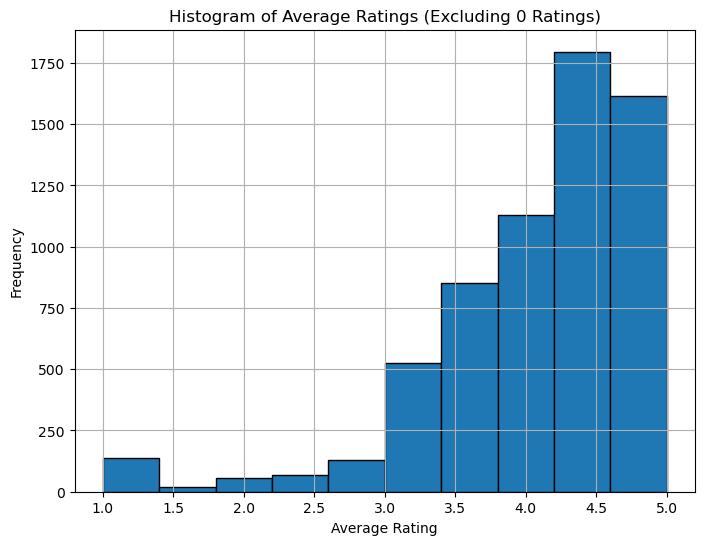

In [107]:

filtered_data = C[C['Average Rating'] > 0]['Average Rating']

plt.figure(figsize=(8, 6))
plt.hist(filtered_data, bins=10, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings (Excluding 0 Ratings)')
plt.grid(True)
plt.show()


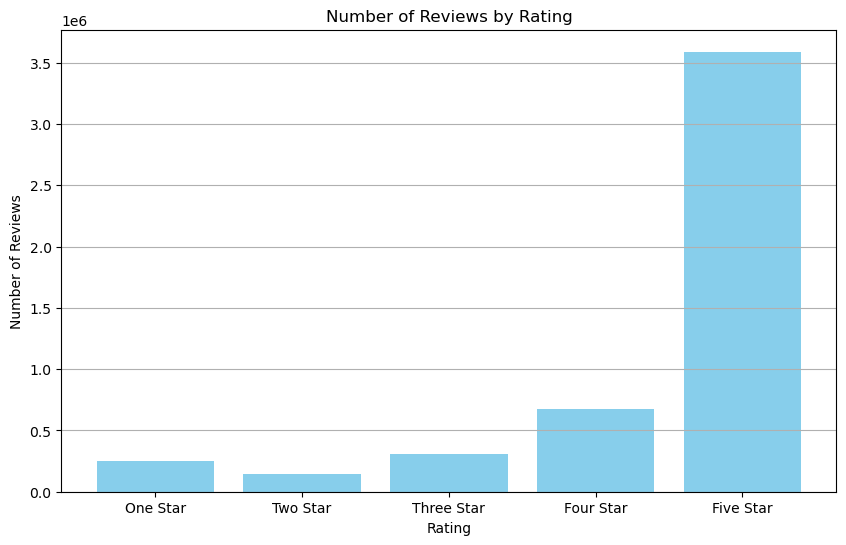

In [100]:
ratings = ['One Star', 'Two Star', 'Three Star', 'Four Star', 'Five Star']
num_reviews = [C['One Star'].sum(), C['Two Star'].sum(), C['Three Star'].sum(), C['Four Star'].sum(), C['Five Star'].sum()]

plt.figure(figsize=(10, 6))
plt.bar(ratings, num_reviews, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Rating')
plt.grid(axis='y')
plt.show()
